<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to APIs

## The `requests` Library
The `requests` library is a library for submitting HTTP requests from Python. Despite its frequent use, it's not included in the Python standard library. You'll need to `pip install requests` yourself.
![](imgs/pokeapi.png)

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create url for API call.
url_squirtle = 'https://pokeapi.co/api/v2/pokemon/squirtle'

In [3]:
# Make request
req = requests.get(url_squirtle)

In [4]:
# Request response code
req.status_code

200

In [5]:
# Text of request
req.text

'{"abilities":[{"ability":{"name":"torrent","url":"https://pokeapi.co/api/v2/ability/67/"},"is_hidden":false,"slot":1},{"ability":{"name":"rain-dish","url":"https://pokeapi.co/api/v2/ability/44/"},"is_hidden":true,"slot":3}],"base_experience":63,"forms":[{"name":"squirtle","url":"https://pokeapi.co/api/v2/pokemon-form/7/"}],"game_indices":[{"game_index":177,"version":{"name":"red","url":"https://pokeapi.co/api/v2/version/1/"}},{"game_index":177,"version":{"name":"blue","url":"https://pokeapi.co/api/v2/version/2/"}},{"game_index":177,"version":{"name":"yellow","url":"https://pokeapi.co/api/v2/version/3/"}},{"game_index":7,"version":{"name":"gold","url":"https://pokeapi.co/api/v2/version/4/"}},{"game_index":7,"version":{"name":"silver","url":"https://pokeapi.co/api/v2/version/5/"}},{"game_index":7,"version":{"name":"crystal","url":"https://pokeapi.co/api/v2/version/6/"}},{"game_index":7,"version":{"name":"ruby","url":"https://pokeapi.co/api/v2/version/7/"}},{"game_index":7,"version":{"na

In [6]:
# Bring in the JSON!
sq = req.json()

type(sq)

dict

In [7]:
# Since we've converted the JSON -> dict, we know how to work with this!
sq.keys()

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [8]:
# we can get the values too (uncomment to run)
sq.values()

dict_values([[{'ability': {'name': 'torrent', 'url': 'https://pokeapi.co/api/v2/ability/67/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'rain-dish', 'url': 'https://pokeapi.co/api/v2/ability/44/'}, 'is_hidden': True, 'slot': 3}], 63, [{'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon-form/7/'}], [{'game_index': 177, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 177, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 177, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version/3/'}}, {'game_index': 7, 'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}}, {'game_index': 7, 'version': {'name': 'silver', 'url': 'https://pokeapi.co/api/v2/version/5/'}}, {'game_index': 7, 'version': {'name': 'crystal', 'url': 'https://pokeapi.co/api/v2/version/6/'}}, {'game_index': 7, 'version': {'name': 'ruby', 'url': 'https://pokeapi.co/api/v2/version/7/'}}, 

In [9]:
# Height, Weight
print("Squirtle Height: ", sq['height'])
print("Squirtle Weight: ", sq['weight'])

Squirtle Height:  5
Squirtle Weight:  90


In [11]:
# Sprites?
# I'm using one key for the sake of screen "real estate"
sq['sprites']['back_default']

'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/back/7.png'

In [12]:
# What moves can Squirtle learn?
sq['moves']

[{'move': {'name': 'mega-punch', 'url': 'https://pokeapi.co/api/v2/move/5/'},
  'version_group_details': [{'level_learned_at': 0,
    'move_learn_method': {'name': 'machine',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/4/'},
    'version_group': {'name': 'red-blue',
     'url': 'https://pokeapi.co/api/v2/version-group/1/'}},
   {'level_learned_at': 0,
    'move_learn_method': {'name': 'machine',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/4/'},
    'version_group': {'name': 'yellow',
     'url': 'https://pokeapi.co/api/v2/version-group/2/'}},
   {'level_learned_at': 0,
    'move_learn_method': {'name': 'tutor',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/3/'},
    'version_group': {'name': 'emerald',
     'url': 'https://pokeapi.co/api/v2/version-group/6/'}},
   {'level_learned_at': 0,
    'move_learn_method': {'name': 'tutor',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/3/'},
    'version_group': {'name': 'firered-leafgreen',
     'u

In [13]:
# Whoa! Let's build a function to extract a pokemon's possible moves
def get_moves_dict(pkmn):
    return [move['move']['name'] for move in pkmn['moves']]

In [14]:
sq_moves = get_moves_dict(sq)

sq_moves

['mega-punch',
 'ice-punch',
 'mega-kick',
 'headbutt',
 'tackle',
 'body-slam',
 'take-down',
 'double-edge',
 'tail-whip',
 'bite',
 'mist',
 'water-gun',
 'hydro-pump',
 'surf',
 'ice-beam',
 'blizzard',
 'bubble-beam',
 'submission',
 'counter',
 'seismic-toss',
 'strength',
 'dig',
 'toxic',
 'confusion',
 'rage',
 'mimic',
 'double-team',
 'withdraw',
 'defense-curl',
 'haze',
 'reflect',
 'bide',
 'waterfall',
 'skull-bash',
 'bubble',
 'rest',
 'substitute',
 'snore',
 'curse',
 'flail',
 'protect',
 'mud-slap',
 'foresight',
 'icy-wind',
 'endure',
 'rollout',
 'swagger',
 'attract',
 'sleep-talk',
 'return',
 'frustration',
 'dynamic-punch',
 'rapid-spin',
 'iron-tail',
 'hidden-power',
 'rain-dance',
 'mirror-coat',
 'rock-smash',
 'whirlpool',
 'fake-out',
 'hail',
 'facade',
 'focus-punch',
 'brick-break',
 'yawn',
 'refresh',
 'secret-power',
 'dive',
 'mud-sport',
 'rock-tomb',
 'water-spout',
 'muddy-water',
 'iron-defense',
 'water-pulse',
 'gyro-ball',
 'brine',
 'nat

In [15]:
base_url = "https://pokeapi.co/api/v2/pokemon/"

# Build a function that would get us a pokemnon JSON
def get_pkmn(name):
    return requests.get(base_url + name).json()

In [16]:
# Use the function to get the JSON 
get_pkmn('snorlax').keys()

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [17]:
# Incorporate both function together
def get_moves(name):
    pkmn = get_pkmn(name)
    return get_moves_dict(pkmn)

In [18]:
get_moves('gyarados')[:5]

['headbutt', 'tackle', 'body-slam', 'take-down', 'thrash']

## Ok, let's try a more complicated API - for stocks!
![](imgs/alpha-vantage.png)
If you haven't already - grab your free API key for Alpha Vantage [here](https://www.alphavantage.co). It takes five seconds.

**(THREAD): Why do you think companies would require the use of an API key?**

Alpha Vantage has documentation [here](https://www.alphavantage.co/documentation/).

In [19]:
key = "D8ASYC8PY2K0OEFJ"

In [20]:
# Most APIs have a single base URL from which API calls are made.
# If you look closely at the examples, this is Alpha Vantage's.
base_url = "https://www.alphavantage.co/query"

In [21]:
# This is the example url/request
"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo"

'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo'

In [22]:
# AV API Demo URL
demo = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo")
demo.status_code

200

In [23]:
demo.json()['Meta Data']

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2021-12-01 19:35:00',
 '4. Interval': '5min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [24]:
# Let's build out this request.
# This is a very common format for pure API requests to come in
res = requests.get(url = base_url,
                  params = {
                      'function':'TIME_SERIES_INTRADAY',
                      'interval':'5min',
                      'symbol':'ADI',
                      'apikey':key
                  })

res.status_code

200

In [25]:
# Let's grab that data!
json = res.json()

json

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
  '2. Symbol': 'ADI',
  '3. Last Refreshed': '2021-12-01 16:45:00',
  '4. Interval': '5min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (5min)': {'2021-12-01 16:45:00': {'1. open': '181.0100',
   '2. high': '181.0100',
   '3. low': '181.0100',
   '4. close': '181.0100',
   '5. volume': '402'},
  '2021-12-01 16:30:00': {'1. open': '180.8700',
   '2. high': '180.8700',
   '3. low': '180.8700',
   '4. close': '180.8700',
   '5. volume': '134'},
  '2021-12-01 16:05:00': {'1. open': '180.8400',
   '2. high': '180.8400',
   '3. low': '180.8400',
   '4. close': '180.8400',
   '5. volume': '62379'},
  '2021-12-01 16:00:00': {'1. open': '182.1800',
   '2. high': '182.2050',
   '3. low': '180.6500',
   '4. close': '180.7400',
   '5. volume': '517808'},
  '2021-12-01 15:55:00': {'1. open': '182.9500',
   '2. high': '183.0100',
   '3. low': '182.1200',
   '4. close': '182

In [26]:
# Well, this looks like a familiar format...
json['Meta Data']

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'ADI',
 '3. Last Refreshed': '2021-12-01 16:45:00',
 '4. Interval': '5min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [28]:
json['Time Series (5min)']['2021-12-01 12:00:00']

{'1. open': '187.2800',
 '2. high': '187.2900',
 '3. low': '186.8300',
 '4. close': '187.0300',
 '5. volume': '30644'}

In [29]:
json.keys()

dict_keys(['Meta Data', 'Time Series (5min)'])

In [30]:
# Turn it into a data frame!
adi = pd.DataFrame(json['Time Series (5min)'])

adi.head()

,2021-12-01 16:45:00,2021-12-01 16:30:00,2021-12-01 16:05:00,2021-12-01 16:00:00,2021-12-01 15:55:00,2021-12-01 15:50:00,2021-12-01 15:45:00,2021-12-01 15:40:00,2021-12-01 15:35:00,2021-12-01 15:30:00,...,2021-11-30 15:50:00,2021-11-30 15:45:00,2021-11-30 15:40:00,2021-11-30 15:35:00,2021-11-30 15:30:00,2021-11-30 15:25:00,2021-11-30 15:20:00,2021-11-30 15:15:00,2021-11-30 15:10:00,2021-11-30 15:05:00
1. open,181.0100,180.8700,180.8400,182.1800,182.9500,183.7500,183.4350,183.0600,183.0100,183.2450,...,180.8000,180.3700,180.4400,179.9850,180.1600,180.3100,180.1600,180.1200,180.3100,179.9700
2. high,181.0100,180.8700,180.8400,182.2050,183.0100,183.8500,183.8400,183.5500,183.3000,183.5700,...,180.9500,180.8600,180.5700,180.5100,180.2000,180.4600,180.3600,180.2100,180.3700,180.3200
3. low,181.0100,180.8700,180.8400,180.6500,182.1200,182.9850,183.3400,182.8900,182.7000,182.9601,...,180.4900,180.3700,180.3100,179.9850,179.9000,180.1600,180.0800,180.0200,180.1100,179.9200
4. close,181.0100,180.8700,180.8400,180.7400,182.2200,183.0500,183.7500,183.4600,183.0500,183.1100,...,180.4900,180.8100,180.3950,180.4600,179.9600,180.2000,180.3600,180.1100,180.1100,180.3100
5. volume,402,134,62379,517808,145522,65178,42144,43380,53435,55213,...,60570,37002,33767,29557,23636,20567,20561,25680,21919,28538


In [32]:
adi = pd.DataFrame(json['Time Series (5min)']).T

adi.head()

,1. open,2. high,3. low,4. close,5. volume
2021-12-01 16:45:00,181.0100,181.0100,181.0100,181.0100,402
2021-12-01 16:30:00,180.8700,180.8700,180.8700,180.8700,134
2021-12-01 16:05:00,180.8400,180.8400,180.8400,180.8400,62379
2021-12-01 16:00:00,182.1800,182.2050,180.6500,180.7400,517808
2021-12-01 15:55:00,182.9500,183.0100,182.1200,182.2200,145522


In [33]:
adi.index = pd.to_datetime(adi.index)

adi.head()

,1. open,2. high,3. low,4. close,5. volume
2021-12-01 16:45:00,181.0100,181.0100,181.0100,181.0100,402
2021-12-01 16:30:00,180.8700,180.8700,180.8700,180.8700,134
2021-12-01 16:05:00,180.8400,180.8400,180.8400,180.8400,62379
2021-12-01 16:00:00,182.1800,182.2050,180.6500,180.7400,517808
2021-12-01 15:55:00,182.9500,183.0100,182.1200,182.2200,145522


In [34]:
adi.index

DatetimeIndex(['2021-12-01 16:45:00', '2021-12-01 16:30:00',
               '2021-12-01 16:05:00', '2021-12-01 16:00:00',
               '2021-12-01 15:55:00', '2021-12-01 15:50:00',
               '2021-12-01 15:45:00', '2021-12-01 15:40:00',
               '2021-12-01 15:35:00', '2021-12-01 15:30:00',
               '2021-12-01 15:25:00', '2021-12-01 15:20:00',
               '2021-12-01 15:15:00', '2021-12-01 15:10:00',
               '2021-12-01 15:05:00', '2021-12-01 15:00:00',
               '2021-12-01 14:55:00', '2021-12-01 14:50:00',
               '2021-12-01 14:45:00', '2021-12-01 14:40:00',
               '2021-12-01 14:35:00', '2021-12-01 14:30:00',
               '2021-12-01 14:25:00', '2021-12-01 14:20:00',
               '2021-12-01 14:15:00', '2021-12-01 14:10:00',
               '2021-12-01 14:05:00', '2021-12-01 14:00:00',
               '2021-12-01 13:55:00', '2021-12-01 13:50:00',
               '2021-12-01 13:45:00', '2021-12-01 13:40:00',
               '2021-12-

In [35]:
adi.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

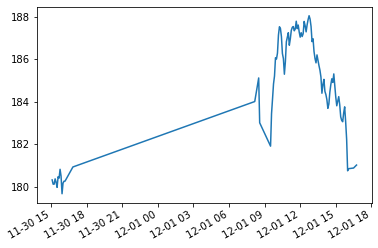

In [36]:
# Plot the closing price
adi['4. close'].astype(float).plot();

In [37]:
# Let's build out this request again - daily stock prices this time
# This is a very common format for pure API requests to come in
res = requests.get(url = base_url,
                  params = {
                      'function':'TIME_SERIES_DAILY',
                      'symbol':'TSLA',
                      'apikey':key
                  })

res.status_code

200

In [39]:
json = res.json()

json['Time Series (Daily)']

{'2021-12-02': {'1. open': '1099.0600',
  '2. high': '1113.0000',
  '3. low': '1056.6500',
  '4. close': '1084.6000',
  '5. volume': '24239846'},
 '2021-12-01': {'1. open': '1160.6950',
  '2. high': '1172.8399',
  '3. low': '1090.7600',
  '4. close': '1095.0000',
  '5. volume': '22934698'},
 '2021-11-30': {'1. open': '1144.3700',
  '2. high': '1168.0000',
  '3. low': '1118.0000',
  '4. close': '1144.7600',
  '5. volume': '27092038'},
 '2021-11-29': {'1. open': '1100.9900',
  '2. high': '1142.6700',
  '3. low': '1100.1900',
  '4. close': '1136.9900',
  '5. volume': '19464467'},
 '2021-11-26': {'1. open': '1099.4700',
  '2. high': '1108.7827',
  '3. low': '1081.0000',
  '4. close': '1081.9200',
  '5. volume': '11680890'},
 '2021-11-24': {'1. open': '1080.3900',
  '2. high': '1132.7700',
  '3. low': '1062.0000',
  '4. close': '1116.0000',
  '5. volume': '22560238'},
 '2021-11-23': {'1. open': '1167.5100',
  '2. high': '1180.4999',
  '3. low': '1062.7000',
  '4. close': '1109.0300',
  '5. 

In [40]:
tesla = pd.DataFrame(json['Time Series (Daily)']).T

tesla.index = pd.to_datetime(tesla.index)

tesla.head()

,1. open,2. high,3. low,4. close,5. volume
2021-12-02,1099.0600,1113.0000,1056.6500,1084.6000,24239846
2021-12-01,1160.6950,1172.8399,1090.7600,1095.0000,22934698
2021-11-30,1144.3700,1168.0000,1118.0000,1144.7600,27092038
2021-11-29,1100.9900,1142.6700,1100.1900,1136.9900,19464467
2021-11-26,1099.4700,1108.7827,1081.0000,1081.9200,11680890


In [41]:
tesla.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

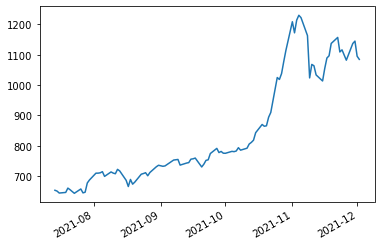

In [42]:
# Plot the closing price of Tesla
tesla['4. close'].astype(float).plot();

### Challenge
Write your own function that inputs a ticker symbol and outputs the above.

In [43]:
def get_stock_data(ticker):
    base_url = 'https://www.alphavantage.co/query'
    
    req = requests.get(url = base_url,
                      params = {
                          'function':'TIME_SERIES_DAILY',
                          'symbol':ticker,
                          'apikey':key
                      })
    print(req.status_code)
    data = req.json()['Time Series (Daily)']
    return pd.DataFrame(data).T

In [44]:
beyond = get_stock_data("BYND")
beyond.head()

200


,1. open,2. high,3. low,4. close,5. volume
2021-12-02,65.5300,68.4800,64.8000,67.3600,3047925
2021-12-01,70.7900,72.2299,66.2100,66.2600,3261214
2021-11-30,72.7500,74.5800,69.5200,70.2600,4092544
2021-11-29,76.5000,77.0000,73.0700,74.6000,2337124
2021-11-26,74.8100,77.7500,74.6200,76.7200,1830510


In [45]:
aapl = get_stock_data('AAPL')

aapl.head()

200


,1. open,2. high,3. low,4. close,5. volume
2021-12-02,158.7400,164.2000,157.8000,163.7600,136439670
2021-12-01,167.4800,170.3000,164.5300,164.7700,152423003
2021-11-30,159.9850,165.5200,159.9200,165.3000,174048056
2021-11-29,159.3700,161.1900,158.7901,160.2400,88748217
2021-11-26,159.5650,160.4500,156.3600,156.8100,76959752


### Did this feel like a lot of work? You're not alone.
For web APIs such as these, open sourcerers (ordinary programmers like you and me!) like to build language-specific **API wrappers** to easier call the API. Interestingly, based on our very vague definition of APIs, API wrappers are also themselves APIs!

Alpha Vantage has a Python API wrapper made by user `RomelTorres` [here](https://github.com/RomelTorres/alpha_vantage)!

![](imgs/opensource.jpg)

## You want data? You got data.

### Key Takeaway #1: Your favorite thing has a free API
* **Stock prices**: [Alpha Vantage](https://github.com/RomelTorres/alpha_vantage)
* **Cryptocurrency prices**: [ccxt](https://github.com/ccxt/ccxt) provides a unified API for several cryptocurrency markets. You can even buy and sell crypto from within Python!
* **Weather**: [OpenWeather](https://openweathermap.org/api)

### Key Takeaway #2: Your favorite website has a free API
Below is a brief list of websites that have a free API. Note that "free" here means "zero-cost", not "permissive and easy to use." APIs can be abused. Not all Twitter bots are friendly like [Every Sheriff Bot](https://twitter.com/EverySheriff).
* Twitter
* Reddit
* Yelp
* Twitch
* Facebook/Instagram
* GitHub (yes, even GitHub!)
* Most Google services
* Spotify
* Slack (no, you can't have a key.)

## Conclusion & Summary
Today, we
* Learned how HTTP works and
* How we can make HTTP requests from the Python (and also the CL a little)
* How to read API documentation and get the data we want from the internet

## Kraken API Example

In [46]:
import krakenex
from pykrakenapi import KrakenAPI

api = krakenex.API()
k = KrakenAPI(api)

In [47]:
def pull_data(ticker, interval = 1440):
    ticker_str = '_'+str(ticker)
    
    ticker, last = k.get_ohlc_data(str(ticker)+"USD", interval)
    
    col_names = ['time']
    
    for i in ticker.columns:
        if i != 'time':
            col_names.append(i+ticker_str)
    
    return ticker

In [48]:
btc = pull_data('BTC')

btc.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2021-12-02,1638403200,57237.2,57410.2,55848.2,56776.2,56683.9,3165.469955,31940
2021-12-01,1638316800,57007.4,59090.7,56520.0,57237.9,57395.9,4211.555033,41458
2021-11-30,1638230400,57830.2,59230.0,55932.6,56980.7,57493.8,3880.882299,46528
2021-11-29,1638144000,57300.0,58890.0,56755.1,57830.2,57959.4,2979.131136,38569
2021-11-28,1638057600,54757.5,57485.7,53300.0,57300.0,55263.1,2157.942393,29933


<AxesSubplot:xlabel='dtime'>

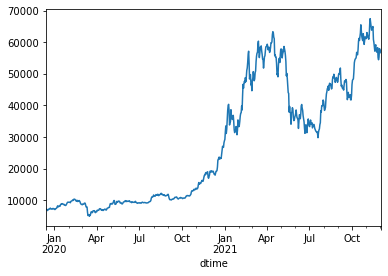

In [49]:
btc['vwap'].plot()

## Twitter API

In [50]:
import hb_twtr_keys as twtr

In [51]:
import os
import webbrowser
from twython import Twython

In [52]:
HB_API_KEY = twtr.API_KEY
HB_SECRET = twtr.SECRET_KEY

In [53]:
temp_client = Twython(HB_API_KEY, HB_SECRET)
temp_creds = temp_client.get_authentication_tokens()

url = temp_creds['auth_url']

In [54]:
print(f'Go visit {url} and get the PIN code and paste it below')

Go visit https://api.twitter.com/oauth/authenticate?oauth_token=mvniBwAAAAAA9oeHAAABfX1IKEM and get the PIN code and paste it below


In [55]:
PIN_CODE = input('please enter the PIN code: ')

please enter the PIN code:  9051699


In [56]:
# Now we use pin code to get the actual tokens

auth_client = Twython(HB_API_KEY,
                     HB_SECRET,
                     temp_creds['oauth_token'],
                     temp_creds['oauth_token_secret'])

final_step = auth_client.get_authorized_tokens(PIN_CODE)

ACCESS_TOKEN = final_step['oauth_token']

ACCESS_TOKEN_SECRET = final_step['oauth_token_secret']

twitter = Twython(HB_API_KEY,
                 HB_SECRET,
                 ACCESS_TOKEN,
                 ACCESS_TOKEN_SECRET)

In [57]:
for status in twitter.search(q = '"data science"')['statuses']:
    user = status['user']['screen_name']
    text = status['text']
    
    print(f'{user}: {text}\n')

raymondh: Data science small sample pop quiz. What can you infer from the first three Omicron cases in the U.S.?

* In CA, mi… https://t.co/4dEBc0LTVh

G_Deepak3: RT @ashwinravi99: Here is a unique opportunity to pursue BSc in Data Science @iitm_bsc from India’s
top Institute, IIT Madras without JEE.…

DataAugmented: Event: Free AI and data science clinic, 14th December (Online Workshop)
https://t.co/6FZHmunKCd
submitted by    /u/… https://t.co/mGZubrRz7q

Swarazar: RT @ainunnajib: Excel is the most popular data science tool

davidshor: RT @rstatsai: Head of Data Science at Blue Rose Research, @davidshor will be giving a talk on how statistics and data science are commonly…

YNTKTW: RT @collegemenfess: [cm] halo! aku bawa info pelatihan gratis nih! yg tertarik dengan machine learning bisa banget join pelatihan machine l…

mtsudatascience: Why consider Data Science? There are several reasons, here are a few. 
https://t.co/R8hYwEUDmf https://t.co/T309T8TB0K

p0nk: (4) Processes for data 